<a href="https://colab.research.google.com/github/Coder-Dilip/Tensorflow-Image-Classification/blob/main/churnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [235]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [236]:
df1=df.drop(['customerID','gender'], axis=1)
Partner_list=[]
for el in df1['Partner']:
  Partner_list.append(float(0) if el=="No" else float(1))
df1['Partner']=Partner_list


In [237]:
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,0.0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,0.0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,0.0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0.0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [238]:
binary_list=['Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for el in binary_list:
  curr_list=[]
  for x in df1[el]:
    curr_list.append(float(0) if x=="No" else float(1))
  df1[el]=curr_list
  

In [239]:

df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1.0,0.0,1,0.0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,29.85,29.85,0.0
1,0,0.0,0.0,34,1.0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0.0,Mailed check,56.95,1889.5,0.0
2,0,0.0,0.0,2,1.0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Mailed check,53.85,108.15,1.0
3,0,0.0,0.0,45,0.0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0.0
4,0,0.0,0.0,2,1.0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1.0,Electronic check,70.70,151.65,1.0


In [240]:
def uniques(el):
  s=set()
  for x in df1[el]:
    s.add(x)
  return s

In [241]:
uniques('InternetService')

{'DSL', 'Fiber optic', 'No'}

In [242]:
uniques('SeniorCitizen')

{0, 1}

In [243]:
uniques('MultipleLines')

{'No', 'No phone service', 'Yes'}

In [244]:
uniques('Contract')

{'Month-to-month', 'One year', 'Two year'}

In [245]:
uniques('PaymentMethod')

{'Bank transfer (automatic)',
 'Credit card (automatic)',
 'Electronic check',
 'Mailed check'}

In [246]:
onehot=['InternetService','MultipleLines','Contract','PaymentMethod']

for el in onehot:
  df2 = pd.get_dummies(df1[el], prefix=el)
  for x in df2:
    df1[x]=df2[x]
  df1=df1.drop([el], axis=1)


In [247]:
df1.Churn

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [248]:
df1 = df1.drop(labels=[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], axis=0)
df1['MonthlyCharges']=df['MonthlyCharges']/max(df['MonthlyCharges'])
# df1['TotalCharges']=df['TotalCharges']/max(df['TotalCharges'])
X=df1.drop('Churn',axis='columns')
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,1,0
1,0,0.0,0.0,34,1.0,1.0,0.0,1.0,0.0,0.0,...,1,0,0,0,1,0,0,0,0,1
2,0,0.0,0.0,2,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,0,1
3,0,0.0,0.0,45,0.0,1.0,0.0,1.0,1.0,0.0,...,0,1,0,0,1,0,1,0,0,0
4,0,0.0,0.0,2,1.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,0,0,0,0,1,0


In [249]:
y=df1['Churn']
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7032, dtype: float64

In [250]:
(x_train,x_test,y_train,y_test)=train_test_split(X,y,test_size=0.25,random_state=42)

x_train=np.asarray(x_train).astype(np.float32)
x_test=np.asarray(x_test).astype(np.float32)
y_train=np.asarray(y_train).astype(np.float32)
y_test=np.asarray(y_test).astype(np.float32)

In [251]:
from tensorflow import keras

In [252]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                             
                               tf.keras.layers.Dense(26,activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1,activation='sigmoid')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
165/165 [==============================] - 1s 2ms/step - loss: 6.5562 - accuracy: 0.5686
Epoch 2/100
165/165 [==============================] - 0s 2ms/step - loss: 0.9231 - accuracy: 0.6210
Epoch 3/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6323 - accuracy: 0.7325
Epoch 4/100
165/165 [==============================] - 0s 2ms/step - loss: 0.6095 - accuracy: 0.7552
Epoch 5/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5834 - accuracy: 0.7639
Epoch 6/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5053 - accuracy: 0.7744
Epoch 7/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7797
Epoch 8/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5106 - accuracy: 0.7793
Epoch 9/100
165/165 [==============================] - 0s 2ms/step - loss: 0.4902 - accuracy: 0.7838
Epoch 10/100
165/165 [==============================] - 0s 2ms/step - loss: 0.5406 - accura

In [253]:
model_1.evaluate(x_test,y_test)


55/55 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.7941


[0.42204657196998596, 0.7940841913223267]

Text(69.0, 0.5, 'Truth')

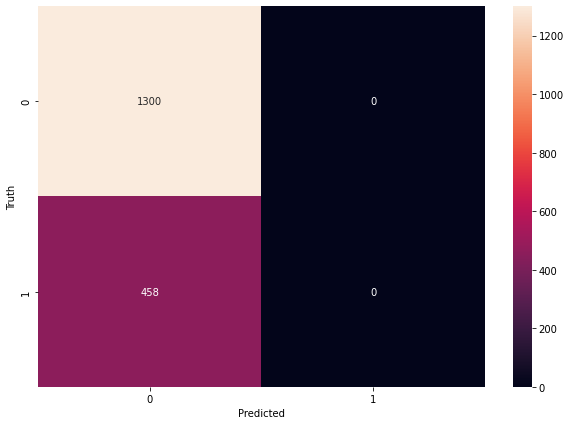

In [262]:
from sklearn.metrics import confusion_matrix , classification_report

y_predicted=model_1.predict(x_test)
import matplotlib.pyplot as plt
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')